# COVID-19 Impact on Bike Sharing System Using Ford GoBike System Data
## by Han Kim

## Preliminary Wrangling

> Bay Wheels (began with Bay Area Bike Share in Auguest, 2013 and with Ford GoBike in June, 2017 and named Bay Wheels from June, 2019) is a regional public bicycle sharing system in the San Francisco Bay Area, California. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District and owned by Lyft.

> In this project, the data set of March 2020 has been chosen for understanding the impacts of COVID-19 on the bike sharing system in the Bay Area since nearly 40 million Californians including Bay Area residence were required to stay home and limit social interaction until further notice when Gov. Gavin Newsom announced a stay-at-home order on March 19 to reduce the spread of the novel coronavirus. According to [abc7news](https://abc7news.com/shelter-in-place-extended-bay-area-extends-stay-at-home-6-counties/6019152/), the statewide order followed similar action in the San Francisco Bay Area where residents in six counties, and later all nine, were told to shelter-in-place starting `March 17` to slow the spread of the virus. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load 2020/03 dataset using pandas module
df = pd.read_csv('202003-baywheels-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,176799.000000,110696.000000,176799.000000,176799.000000,111097.000000,176799.000000,176799.000000,176799.000000
mean,861.590156,185.082261,37.732506,-122.339595,179.244228,37.731290,-122.335029,332033.876114
std,1528.143090,154.647521,0.170476,0.336403,153.858017,0.278159,0.788013,310588.686471
min,60.000000,3.000000,0.000000,-122.513814,3.000000,0.000000,-122.529747,17.000000
25%,374.000000,58.000000,37.763708,-122.421339,53.000000,37.763848,-122.420377,11695.000000
50%,602.000000,125.000000,37.776598,-122.403969,121.000000,37.776598,-122.403234,299042.000000
75%,963.000000,321.000000,37.789677,-122.390648,309.000000,37.789747,-122.390648,551560.000000
max,84450.000000,521.000000,37.880222,0.000000,521.000000,37.995942,0.000000,999960.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               176799 non-null int64
start_time                 176799 non-null object
end_time                   176799 non-null object
start_station_id           110696 non-null float64
start_station_name         111349 non-null object
start_station_latitude     176799 non-null float64
start_station_longitude    176799 non-null float64
end_station_id             111097 non-null float64
end_station_name           111794 non-null object
end_station_latitude       176799 non-null float64
end_station_longitude      176799 non-null float64
bike_id                    176799 non-null int64
user_type                  176799 non-null object
rental_access_method       114269 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 18.9+ MB


In [5]:
# Is there any missing values on each column? and how many?
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           66103
start_station_name         65450
start_station_latitude         0
start_station_longitude        0
end_station_id             65702
end_station_name           65005
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
rental_access_method       62530
dtype: int64

In [6]:
# Is there any duplicated row in the dataset?
df.duplicated().sum()

0

### What is the structure of your dataset?

Original dataset contains 176,800 trip records with the following 14 variables.
- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- rental_access_method

### What is/are the main feature(s) of interest in your dataset?

1. popular pickup and drop locations; 
- most frequent time duration of usage and popular hour of the day of usage;
- usage difference of weekday versus weekend;
- the most frequent trip distance;
- and comparison before and after the stay-at-home order 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. start_station_id (start_station_name) and end_station_id (end_station_name);
- duration_sec, start_time, and end_time;
- start_time and end_time;
- latitude and longitude of start_station and end_station

## Cleaning Data

####  1. correcting data type

In [7]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['user_type'] = df['user_type'].astype('category')
df['rental_access_method'] = df['rental_access_method'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               176799 non-null int64
start_time                 176799 non-null datetime64[ns]
end_time                   176799 non-null datetime64[ns]
start_station_id           110696 non-null float64
start_station_name         111349 non-null object
start_station_latitude     176799 non-null float64
start_station_longitude    176799 non-null float64
end_station_id             111097 non-null float64
end_station_name           111794 non-null object
end_station_latitude       176799 non-null float64
end_station_longitude      176799 non-null float64
bike_id                    176799 non-null int64
user_type                  176799 non-null category
rental_access_method       114269 non-null category
dtypes: category(2), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 16.5+ MB


####  2. Setting up the study area (San Francisco only)

In [8]:
len(df.start_station_id.unique()),len(df.start_station_name.unique()),len(df.start_station_latitude.unique()),len(df.start_station_longitude.unique())

(444, 448, 61656, 62454)

In [9]:
len(df.end_station_id.unique()),len(df.end_station_name.unique()),len(df.end_station_latitude.unique()),len(df.end_station_longitude.unique())

(444, 448, 61440, 62292)

Text(0.5, 1.0, 'Scatter plot for available station ID')

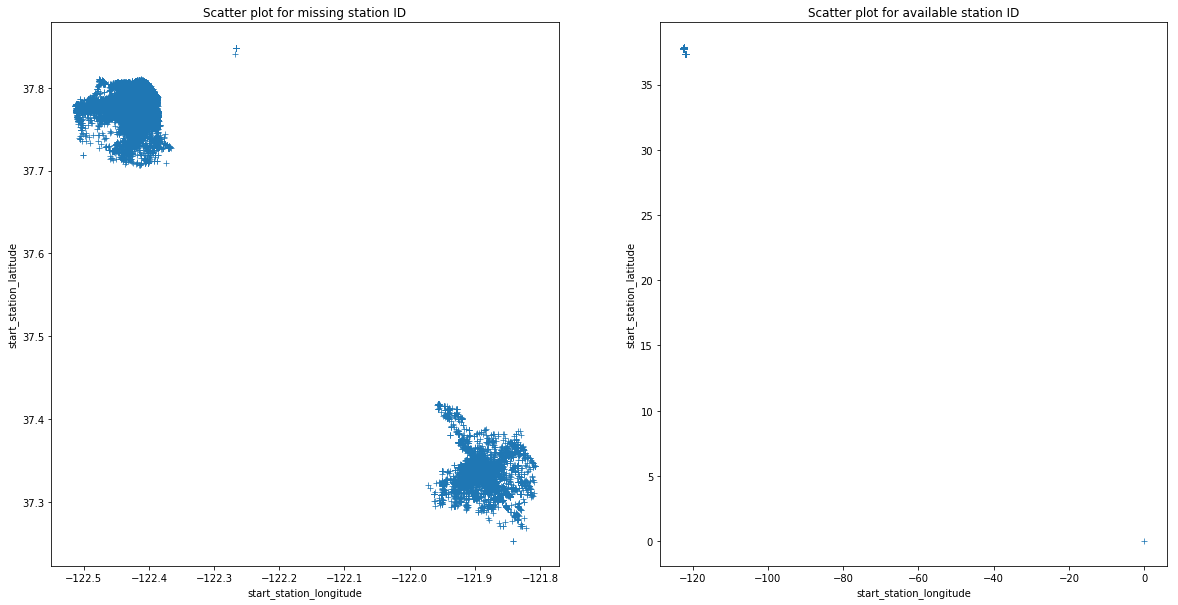

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sb.scatterplot(data = df[df.start_station_id.isnull()], 
                x = "start_station_longitude",
                y = "start_station_latitude",marker="+")
plt.title('Scatter plot for missing station ID')
plt.subplot(1, 2, 2)
sb.scatterplot(data = df[df.start_station_id.notnull()], 
                x = "start_station_longitude",
                y = "start_station_latitude",marker="+")
plt.title('Scatter plot for available station ID')

In [11]:
df.query('start_station_longitude==0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
62530,1067,2020-03-02 20:19:11,2020-03-02 20:36:58,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735035,-122.391193,850653,Subscriber,app


In [12]:
df.query('start_station_latitude==0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
62530,1067,2020-03-02 20:19:11,2020-03-02 20:36:58,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735035,-122.391193,850653,Subscriber,app


In [13]:
# remove the row whose longitue and latitide are 0, which is out of Bay Area boundry 
df = df[df.start_station_longitude!=0]

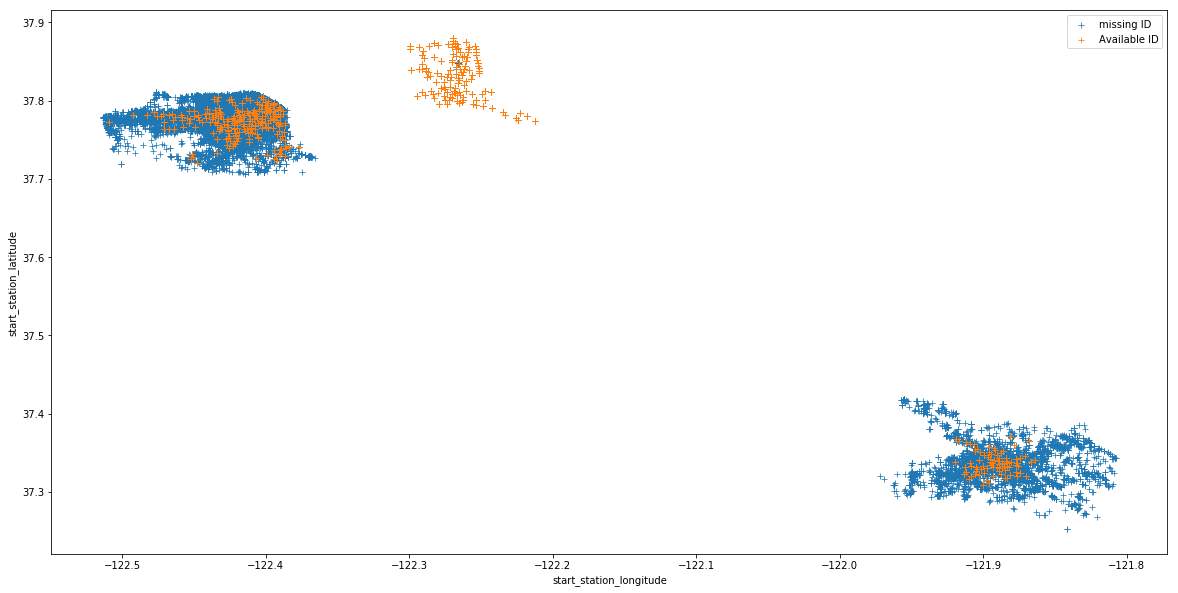

In [14]:
plt.figure(figsize=(20,10))
sb.scatterplot(data = df[df.start_station_id.isnull()], 
                x = "start_station_longitude",
                y = "start_station_latitude",marker="+", label = 'missing ID')
sb.scatterplot(data = df[df.start_station_id.notnull()], 
                x = "start_station_longitude",
                y = "start_station_latitude",marker="+", label = 'Available ID')

In [15]:
# select only San Francisco Area
df = df.query('end_station_latitude > 37.6 and end_station_latitude < 37.9 and end_station_longitude > -122.6 and end_station_longitude < -122.35 and start_station_latitude > 37.6 and start_station_latitude < 37.9 and start_station_longitude > -122.6 and start_station_longitude < -122.35')

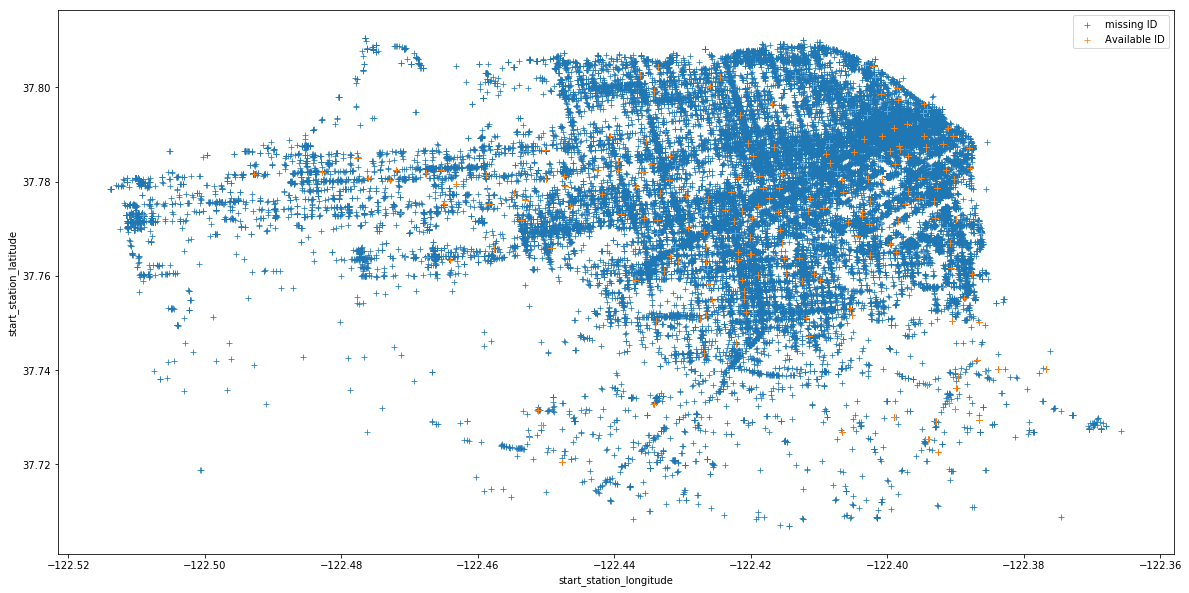

In [16]:
plt.figure(figsize=(20,10))
sb.scatterplot(data = df[df.start_station_id.isnull()], 
                x = "start_station_longitude",
                y = "start_station_latitude",marker="+", label = 'missing ID')
sb.scatterplot(data = df[df.start_station_id.notnull()], 
                x = "start_station_longitude",
                y = "start_station_latitude",marker="+", label = 'Available ID')

To have the same period of study before and after shelter in place order in San Francisco Bay Area, the dataset is divided into two groups from 3/1 (Sunday) through 3/14 (Saturday) and 3/18(Wednesday) through 3/31(Tuesday). 

In [17]:

df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')

'''
df_before = df.query('start_date<"2020-03-15"')
df_after = df.query('start_date>"2020-03-17"')
df_before.shape[0],df_after.shape[0]
'''

'\ndf_before = df.query(\'start_date<"2020-03-15"\')\ndf_after = df.query(\'start_date>"2020-03-17"\')\ndf_before.shape[0],df_after.shape[0]\n'

In [18]:
def sip(row):
    if row['start_date'] <'2020-03-15':
        val = 'Before shelter-in-place'
    elif row['start_date'] >'2020-03-17':
        val = 'After shelter-in-place'
    else:
        val = None
    return val
            
df['SIP']=df.apply(sip, axis=1)
df.SIP.value_counts()

Before shelter-in-place    107407
After shelter-in-place      24896
Name: SIP, dtype: int64

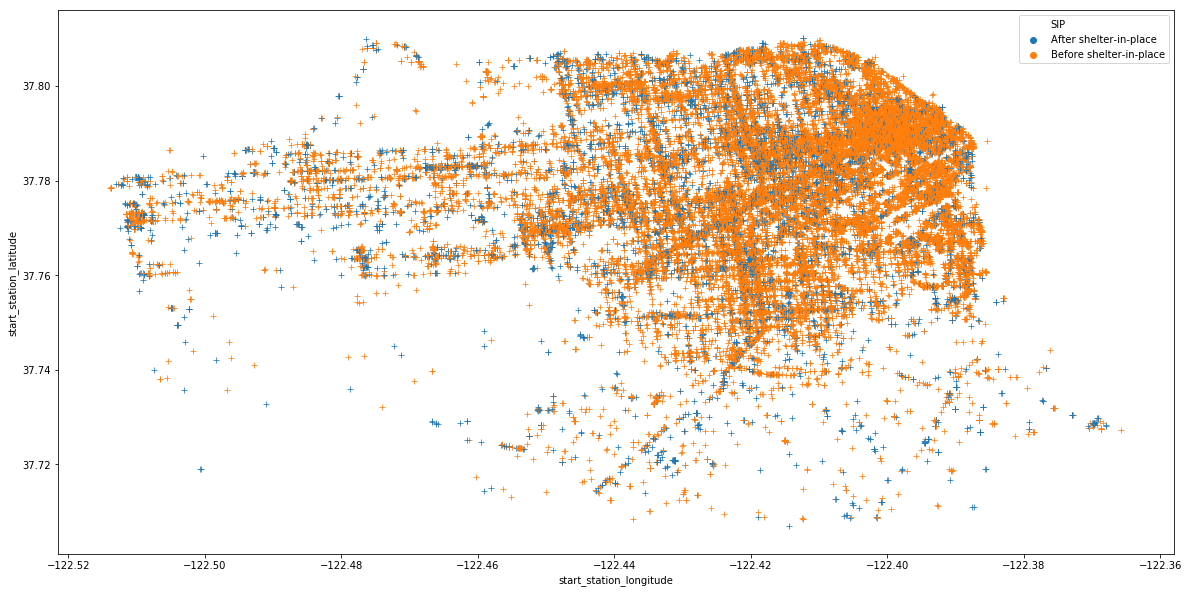

In [19]:
plt.figure(figsize=(20,10))
sb.scatterplot(data = df, 
                x = "start_station_longitude",
                y = "start_station_latitude",marker="+", hue = 'SIP')


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### 1. Trip distribution of hour of the day 

In [20]:
df['start_hourofday'] = df.start_time.dt.strftime('%H')


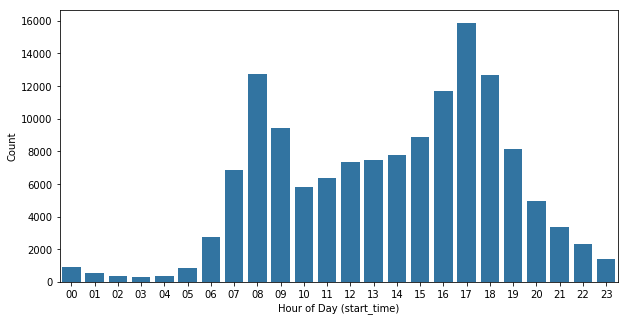

In [21]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

sb.countplot(data=df, x='start_hourofday', color=base_color);
plt.xlabel('Hour of Day (start_time)');
plt.ylabel('Count');

> The number of trips for March 2020 has peaked two times around 8-9 and 17-18.

In [22]:
'''
plt.figure(figsize = [20, 5])
base_color_1 = sb.color_palette()[1]
base_color_2 = sb.color_palette()[2]
plt.subplot(1, 2, 1)
sb.countplot(data=df_before, x='start_hourofday', color=base_color_1);
plt.xlabel('Hour of Day (start_time)');
plt.ylabel('Count');
plt.title('Before shelter-in-place');

plt.subplot(1, 2, 2)
sb.countplot(data=df_after, x='start_hourofday', color=base_color_2);
plt.xlabel('Hour of Day (start_time)');
plt.title('Count');
plt.title('After shelter-in-place');
'''

"\nplt.figure(figsize = [20, 5])\nbase_color_1 = sb.color_palette()[1]\nbase_color_2 = sb.color_palette()[2]\nplt.subplot(1, 2, 1)\nsb.countplot(data=df_before, x='start_hourofday', color=base_color_1);\nplt.xlabel('Hour of Day (start_time)');\nplt.ylabel('Count');\nplt.title('Before shelter-in-place');\n\nplt.subplot(1, 2, 2)\nsb.countplot(data=df_after, x='start_hourofday', color=base_color_2);\nplt.xlabel('Hour of Day (start_time)');\nplt.title('Count');\nplt.title('After shelter-in-place');\n"

#### 2. Trip distribution of day of the week

In [23]:
df['start_dayofweek'] = df.start_time.dt.strftime('%A')


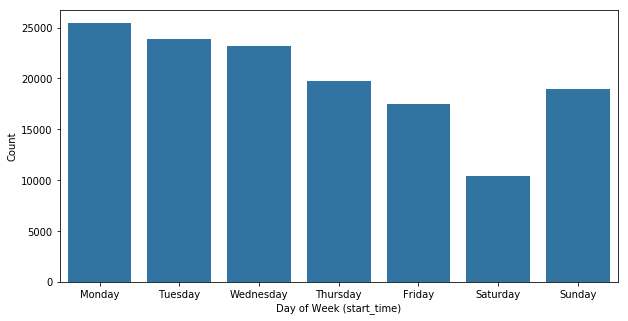

In [24]:

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = [10, 5])
sb.countplot(data=df, x='start_dayofweek',color =base_color, order=weekday);
plt.xlabel('Day of Week (start_time)');
plt.ylabel('Count');


> The number of trips from Monday through Sunday was compared to each other. More trips on weekdays (Monday - Friday) compared to weekends. Among the weekdays, Monday has more trips and Friday has fewer trips.

In [25]:
'''
plt.figure(figsize = [20, 5])




plt.subplot(1, 2, 1)
sb.countplot(data=df_before, x='start_dayofweek', color=base_color_1, order=weekday);
plt.xlabel('Day of Week (start_time)');
plt.ylabel('Count');
plt.title('Before shelter-in-place');

plt.subplot(1, 2, 2)
sb.countplot(data=df_after, x='start_dayofweek', color=base_color_2, order=weekday);
plt.xlabel('Day of Week (start_time)');
plt.ylabel('Count');
plt.title('Before shelter-in-place');
'''

"\nplt.figure(figsize = [20, 5])\n\n\n\n\nplt.subplot(1, 2, 1)\nsb.countplot(data=df_before, x='start_dayofweek', color=base_color_1, order=weekday);\nplt.xlabel('Day of Week (start_time)');\nplt.ylabel('Count');\nplt.title('Before shelter-in-place');\n\nplt.subplot(1, 2, 2)\nsb.countplot(data=df_after, x='start_dayofweek', color=base_color_2, order=weekday);\nplt.xlabel('Day of Week (start_time)');\nplt.ylabel('Count');\nplt.title('Before shelter-in-place');\n"

#### 3. User type

In [26]:
df.user_type.value_counts()

Subscriber    79790
Customer      59375
Name: user_type, dtype: int64

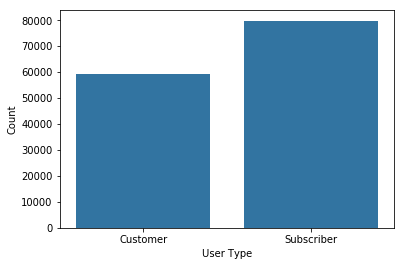

In [27]:
sb.countplot(data=df, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');


> The number of Subscriber is higher than Customer.

In [28]:
'''
plt.figure(figsize = [20, 5])


plt.subplot(1, 2, 1)
sb.countplot(data=df_before, x='user_type', color=base_color_1);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Before shelter-in-place');

plt.subplot(1, 2, 2)
sb.countplot(data=df_after, x='user_type', color=base_color_2);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Before shelter-in-place');
'''

"\nplt.figure(figsize = [20, 5])\n\n\nplt.subplot(1, 2, 1)\nsb.countplot(data=df_before, x='user_type', color=base_color_1);\nplt.xlabel('User Type');\nplt.ylabel('Count');\nplt.title('Before shelter-in-place');\n\nplt.subplot(1, 2, 2)\nsb.countplot(data=df_after, x='user_type', color=base_color_2);\nplt.xlabel('User Type');\nplt.ylabel('Count');\nplt.title('Before shelter-in-place');\n"

#### 4. Rental Access Method

In [29]:
df.rental_access_method.value_counts()

app        91144
clipper     4954
Name: rental_access_method, dtype: int64

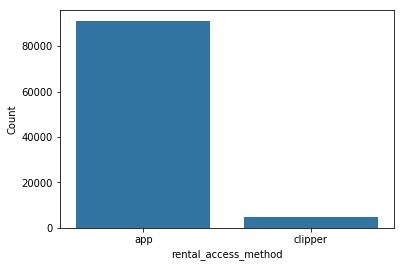

In [30]:
sb.countplot(data=df, x='rental_access_method', color=base_color);
plt.ylabel('Count');


> In terms of rental access methods, mobile app is much higher than clipper card, which is the Bay Area's all-in-all transit card.

In [31]:
'''
plt.figure(figsize = [20, 5])


plt.subplot(1, 2, 1)
sb.countplot(data=df_before, x='rental_access_method', color=base_color_1);
plt.ylabel('Count');
plt.title('Before shelter-in-place');

plt.subplot(1, 2, 2)
sb.countplot(data=df_after, x='rental_access_method', color=base_color_2);
plt.ylabel('Count');
plt.title('Before shelter-in-place');
'''

"\nplt.figure(figsize = [20, 5])\n\n\nplt.subplot(1, 2, 1)\nsb.countplot(data=df_before, x='rental_access_method', color=base_color_1);\nplt.ylabel('Count');\nplt.title('Before shelter-in-place');\n\nplt.subplot(1, 2, 2)\nsb.countplot(data=df_after, x='rental_access_method', color=base_color_2);\nplt.ylabel('Count');\nplt.title('Before shelter-in-place');\n"

#### 5. Trip duration distribution

In [32]:
df['duration_min'] = df['duration_sec']/60
df['duration_min'].describe()
#sb.boxplot(df['duration_min'])


count    139165.000000
mean         14.746537
std          24.466521
min           1.000000
25%           6.666667
50%          10.516667
75%          16.483333
max        1407.500000
Name: duration_min, dtype: float64

In [33]:
df['duration_min'].quantile(0.995)

106.72866666666621

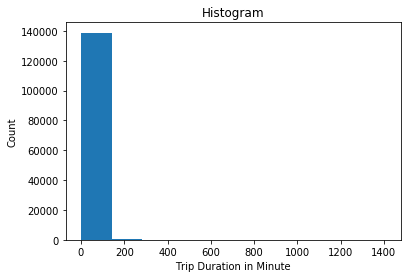

In [34]:
plt.hist(data=df, x='duration_min', color=base_color);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count')
plt.title('Histogram');

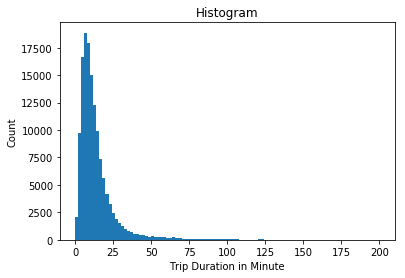

In [35]:
bin_size = 2

bins = np.arange(0, 200+bin_size, bin_size)
plt.hist(data=df, x='duration_min', bins=bins, color=base_color);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count');
plt.title('Histogram');

> Bike trip duration distribution looks like following to F distribution shape.4 through 6 minutes is the highest count when bin size was applied with 2. The highest duration during the period was 1407 minutes, which is almost a day. The 99.5 percentile of the trip duration was 106 minutes. For the histogram of the trip duration, we limited the maximum of bin as 200 for a better histogram by removing outliers.


#### 6. Busy stations for undocking and docking

In [36]:
df['start_station_name'].values

array(['Cruise Terminal at Pier 27',
       'San Francisco City Hall (Polk St at Grove St)',
       'Arguello Blvd at Geary Blvd', ..., nan, nan, nan], dtype=object)

In [37]:
# Top 10 busiest undocking stations
top_start_stations = df['start_station_name'].value_counts()[:10]
top_start_stations

San Francisco Caltrain (Townsend St at 4th St)        1910
Market St at 10th St                                  1851
Market St at Steuart St                               1446
Berry St at 4th St                                    1414
Powell St BART Station (Market St at 4th St)          1306
Howard St at Beale St                                 1158
Montgomery St BART Station (Market St at 2nd St)      1116
Powell St BART Station (Market St at 5th St)          1100
San Francisco Ferry Building (Harry Bridges Plaza)     951
Rhode Island St at 17th St                             908
Name: start_station_name, dtype: int64

In [38]:
# Top 10 busiest docking stations
top_end_stations = df['end_station_name'].value_counts()[:10]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

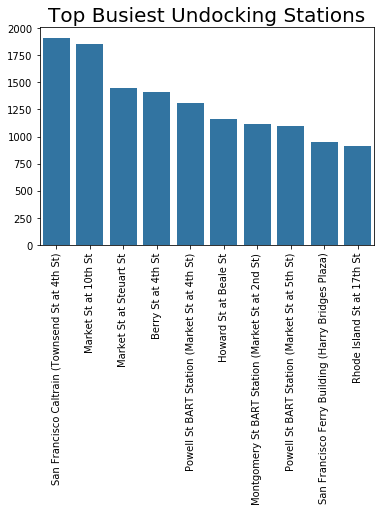

In [39]:
sb.barplot(top_start_stations.index, top_start_stations.values, color = base_color)
plt.title('Top Busiest Undocking Stations', size=20)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

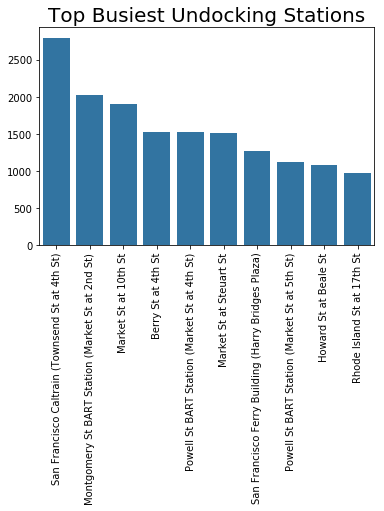

In [40]:
sb.barplot(top_end_stations.index, top_end_stations.values, color = base_color)
plt.title('Top Busiest Undocking Stations', size=20)

plt.xticks(rotation=90)

> San Francisco Caltrain (Townsend St at 4th St) was selected as the busiest station for both undocking stations (start_station) and docking stations (end_station) during the study period.


#### 7. Trip Distance from start stations to end stations

In [41]:
import geopy.distance

def cal_distance (lat1,lon1,lat2,lon2):
    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)

    return geopy.distance.vincenty(coords_1, coords_2).mi

In [42]:

#df['trip_distance'] = cal_distance(df['start_station_latitude'],df['start_station_longitude'],df['end_station_latitude'],df['end_station_longitude'])
df['trip_distance'] = df.apply(lambda x: cal_distance(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'],x['end_station_longitude']), axis=1)

C:\Users\altai\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  import sys


Text(0, 0.5, 'Count')

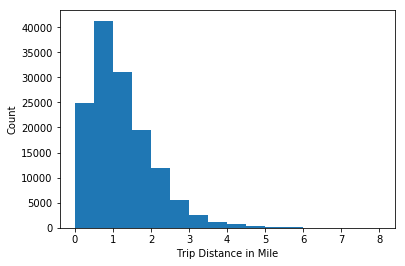

In [43]:
bin_size = 0.5

bins = np.arange(0, 8+bin_size, bin_size)

plt.hist(data=df, x='trip_distance', bins= bins, color=base_color);
plt.xlabel('Trip Distance in Mile');
plt.ylabel('Count')


> Bike trip distance has also been distributed in a histogram when bin size is at 0.5. The most frequent trip distance is 0.5 through 1 mile. For this analysis, the distance was calculated with the given latitude and longitude values using the geopy.distance module. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As mentioned earlier, we only were working on the San Francisco area for March 2020, which could be divided into two datasets before and after the shelter-in-place command.

> The number of trips for March 2020 has peaked two times around 8-9 am and 17-18 pm. For extracting an hour value each trip from ‘start_time’, the data type of ‘start_time’ variable had to be converted to DateTime type, and the hour variable had to be saved in a new column.

> The number of trips from Monday through Sunday was compared to each other. More trips on weekdays (Monday - Friday) compared to weekends. Among the weekdays, Monday has more trips and Friday has fewer trips. The ‘day of the week’ values were extracted from the start_time feature. 

> Bike trip duration distribution looks like following to F distribution shape.4 through 6 minutes is the highest count when bin size was applied with 2. The highest duration during the period was 1407 minutes, which is almost a day. The 99.5 percentile of the trip duration was 106 minutes. For the histogram of the trip duration, we limited the maximum of bin as 200 for a better histogram by removing outliers.

> San Francisco Caltrain (Townsend St at 4th St) was selected as the busiest station for both undocking stations (start_station) and docking stations (end_station) during the study period.

> Bike trip distance has also been distributed in a histogram when bin size is at 0.5. The most frequent trip distance is 0.5 through 1 mile. For this analysis, the distance was calculated with the given latitude and longitude values using the geopy.distance module. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the trip duration looked a little bit weird at first plotting without any changes on the default setup. Using the ‘describe’ method to understand the dataset and limiting the max on the ‘xticks’ method made the histogram to look tidier and clearer.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### 1. Trip distribution of hour of the day (with before and after shelter-in-place)

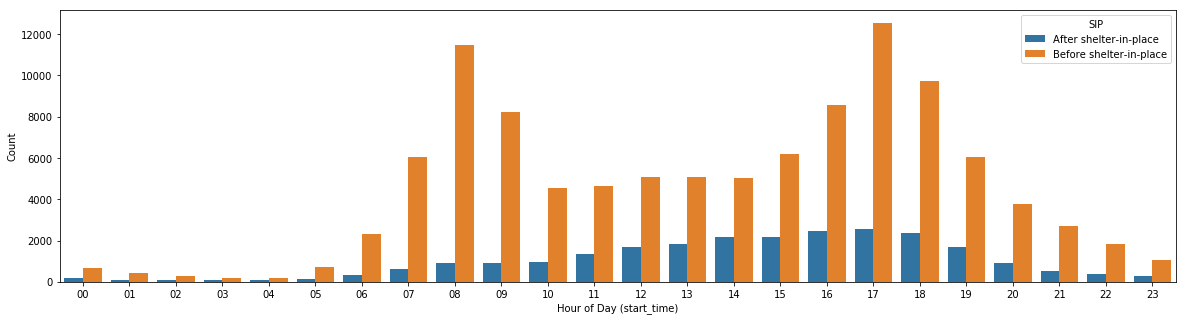

In [44]:
plt.figure(figsize = [20, 5])

sb.countplot(data=df, x='start_hourofday',hue='SIP');
plt.xlabel('Hour of Day (start_time)');
plt.ylabel('Count');




> The number of trips in a day for March 2020 has peaked two times around 8-9 am and 17-18 pm. However, before the SIP order, the distribution of the number of bike trips has a similar pattern to the total trips in March while after the SIP order, the peaked bike trips diminished. Overall the distribution is smooth and around 5-6 pm has the highest number of bike trips made.

#### 2. Trip distribution of day of the week

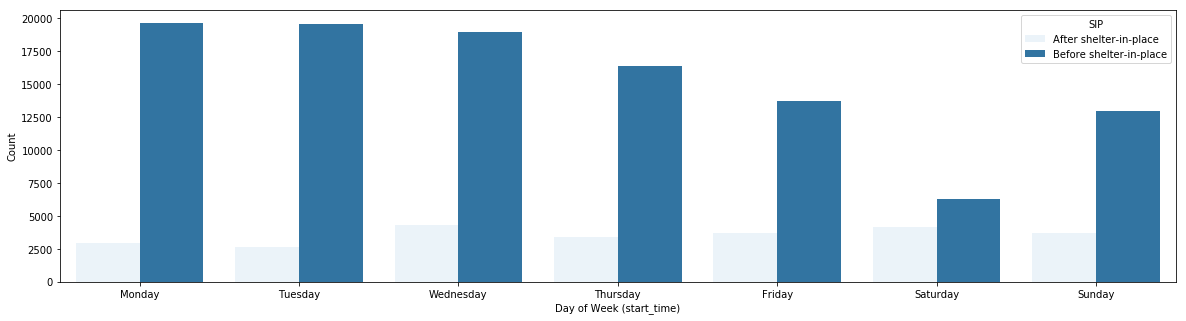

In [45]:
plt.figure(figsize = [20, 5])





sb.countplot(data=df, x='start_dayofweek', color=base_color, order=weekday, hue = 'SIP');
plt.xlabel('Day of Week (start_time)');
plt.ylabel('Count');




> Also, the distribution of the bike trips on the day of the week before the SIP order is similar to the total trips in March, but after the SIP order, the numbers have been dramatically decreased and there is no significant pattern over days of the week.

#### 3. User type

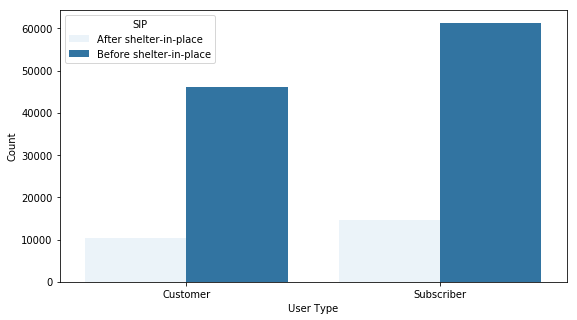

In [46]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df, x='user_type', color=base_color, hue = 'SIP');
plt.xlabel('User Type');
plt.ylabel('Count');




#### 4. Rental Access Method

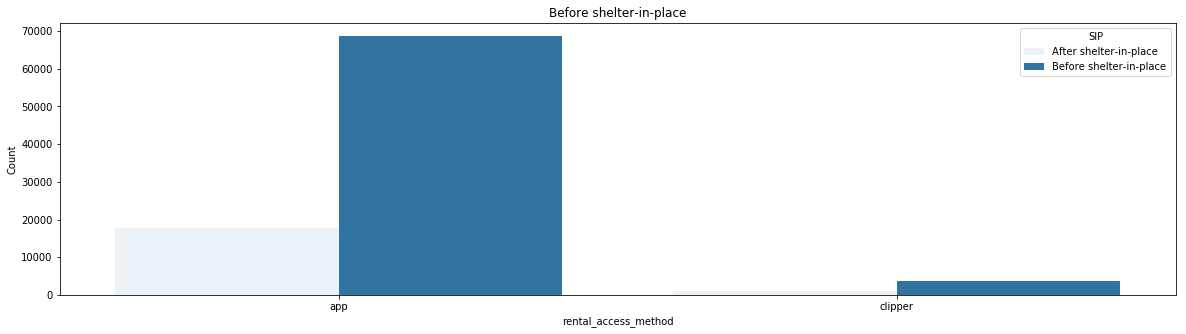

In [47]:
plt.figure(figsize = [20, 5])



sb.countplot(data=df, x='rental_access_method', color=base_color, hue='SIP');
plt.ylabel('Count');
plt.title('Before shelter-in-place');



#### 5. Trip duration distribution

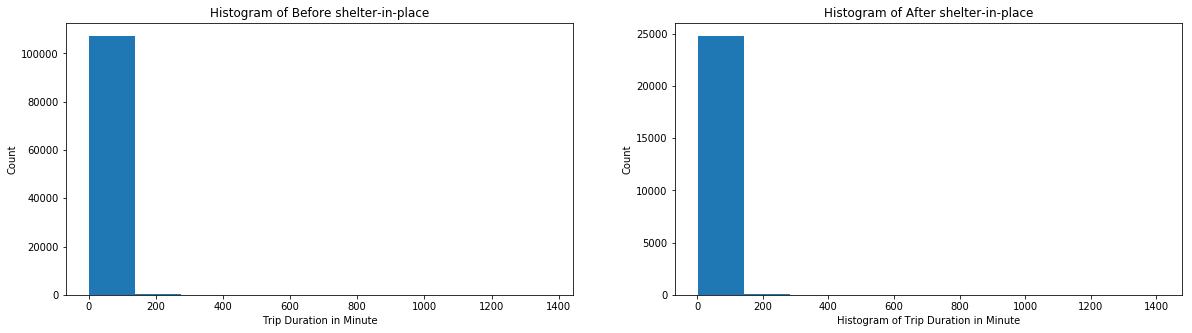

In [48]:
plt.figure(figsize = [20, 5])



plt.subplot(1, 2, 1)
plt.hist(data=df[df.SIP=='Before shelter-in-place'], x='duration_min', color=base_color);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count');
plt.title('Histogram of Before shelter-in-place');

plt.subplot(1, 2, 2)
plt.hist(data=df[df.SIP=='After shelter-in-place'], x='duration_min', color=base_color);
plt.xlabel('Histogram of Trip Duration in Minute');
plt.ylabel('Count');
plt.title('Histogram of After shelter-in-place');

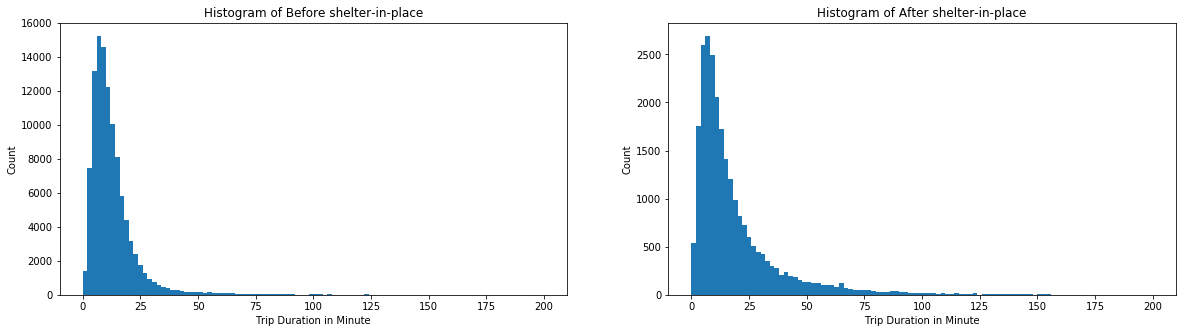

In [49]:
plt.figure(figsize = [20, 5])

bin_size = 2
plt.subplot(1, 2, 1)

bins = np.arange(0, 200+bin_size, bin_size)
plt.hist(data=df[df.SIP=='Before shelter-in-place'], x='duration_min', bins=bins, color=base_color);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count');
plt.title('Histogram of Before shelter-in-place');


plt.subplot(1, 2, 2)
bins = np.arange(0, 200+bin_size, bin_size)
plt.hist(data=df[df.SIP=='After shelter-in-place'], x='duration_min', bins=bins, color=base_color);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count');
plt.title('Histogram of After shelter-in-place');




> Compared to the total bike trip duration, before and after the SIP order have the same pattern,  following to F distribution shape and the highest count on 4 through 6 minutes when bin size was applied with 2.

#### 6. Busy stations for undocking and docking

Not egliable for bivariable analysis

#### 7. Trip Distance from start stations to end stations

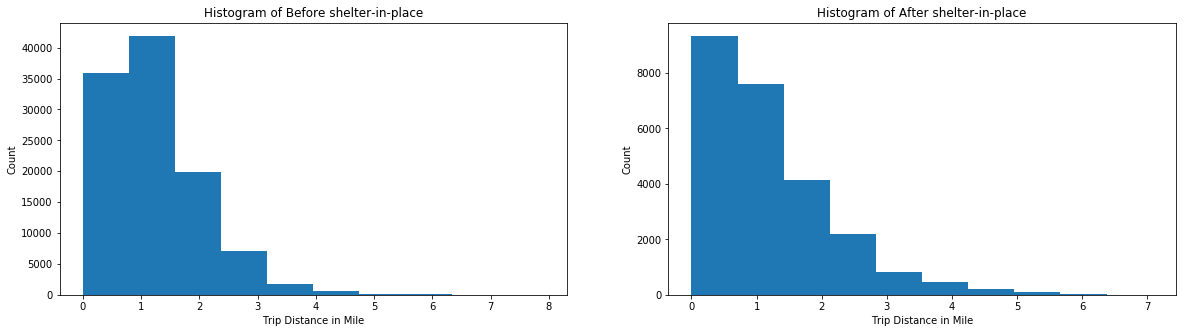

In [50]:
plt.figure(figsize = [20, 5])



plt.subplot(1, 2, 1)
plt.hist(data=df[df.SIP=='Before shelter-in-place'], x='trip_distance', color=base_color);
plt.xlabel('Trip Distance in Mile');
plt.ylabel('Count');
plt.title('Histogram of Before shelter-in-place');

plt.subplot(1, 2, 2)
plt.hist(data=df[df.SIP=='After shelter-in-place'], x='trip_distance', color=base_color);
plt.xlabel('Trip Distance in Mile');
plt.ylabel('Count');
plt.title('Histogram of After shelter-in-place');

> Bike trip distance has also a similar pattern for the total and before the SIP order, which is that the most frequent trip distance is 0.5 through 1 mile. However, after the SIP order, the shorter trip based on the distance was the highest number of bike trips. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For the bivariate exploration, the shelter-in-place (SIP)  variable was applied to conduct a comparative analysis on changes between before and after SIP order on Bike usage in the San Francisco Bay Area.

>The number of trips in a day for March 2020 has peaked two times around 8-9 am and 17-18 pm. However, before the SIP order, the distribution of the number of bike trips has a similar pattern to the total trips in March while after the SIP order, the peaked bike trips diminished. Overall the distribution is smooth and around 5-6 pm has the highest number of bike trips made.

>Also, the distribution of the bike trips before the SIP order is similar to the total trips in March, but after the SIP order, the numbers have been dramatically decreased and there is no significant pattern over days of the week.

>Compared to the total bike trip duration, before and after the SIP order have the same pattern,  following to F distribution shape and the highest count on 4 through 6 minutes when bin size was applied with 2. 
 
>Bike trip distance has also a similar pattern for the total and before the SIP order, which is that the most frequent trip distance is 0.5 through 1 mile. However, after the SIP order, the shorter trip based on the distance was the highest number of bike trips. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> After the SIP order, the bike trip patterns have been changed compared to before the order. 
- First of all, the number of bike trips has been reduced. 
- Second, the highest bin of the bike trip distance has been changed to less than 1 mile.  


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

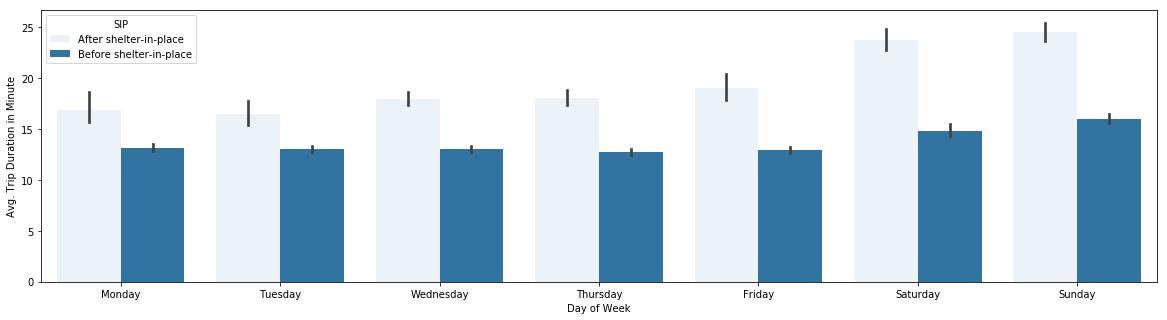

In [51]:
plt.figure(figsize = [20, 5])


sb.barplot(data=df, x='start_dayofweek', y='duration_min', color=base_color, hue='SIP', order=weekday);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');




> When applied trip duration instead of count on the bar plot of the day of the week before and after the SIP order, the after-SIP order has a more average trip duration than the before-SIP order. The count after the SIP order was reduced, but the trip duration increased. During the weekend the average trip duration has higher than the trips on weekdays on both of before and after the SIP order.

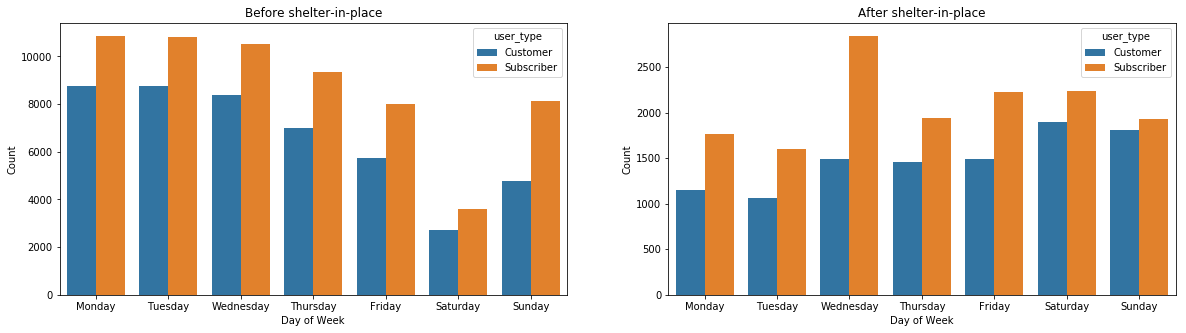

In [52]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df[df['SIP']=='Before shelter-in-place'], x='start_dayofweek', hue='user_type', order=weekday);
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('Before shelter-in-place');

plt.subplot(1, 2, 2)
sb.countplot(data=df[df['SIP']=='After shelter-in-place'], x='start_dayofweek', hue='user_type', order=weekday);
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('After shelter-in-place');



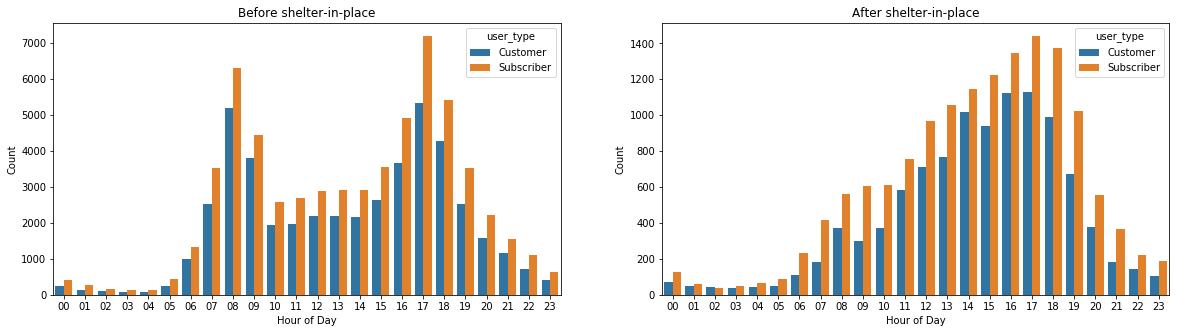

In [53]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.countplot(data=df[df['SIP']=='Before shelter-in-place'], x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.title('Before shelter-in-place');

plt.subplot(1, 2, 2)
sb.countplot(data=df[df['SIP']=='After shelter-in-place'], x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.title('After shelter-in-place');

> The count of the subscriber user type has more than the count of the customer on each day of the week and both before and after the SIP order, even each hour of the day. 

> 

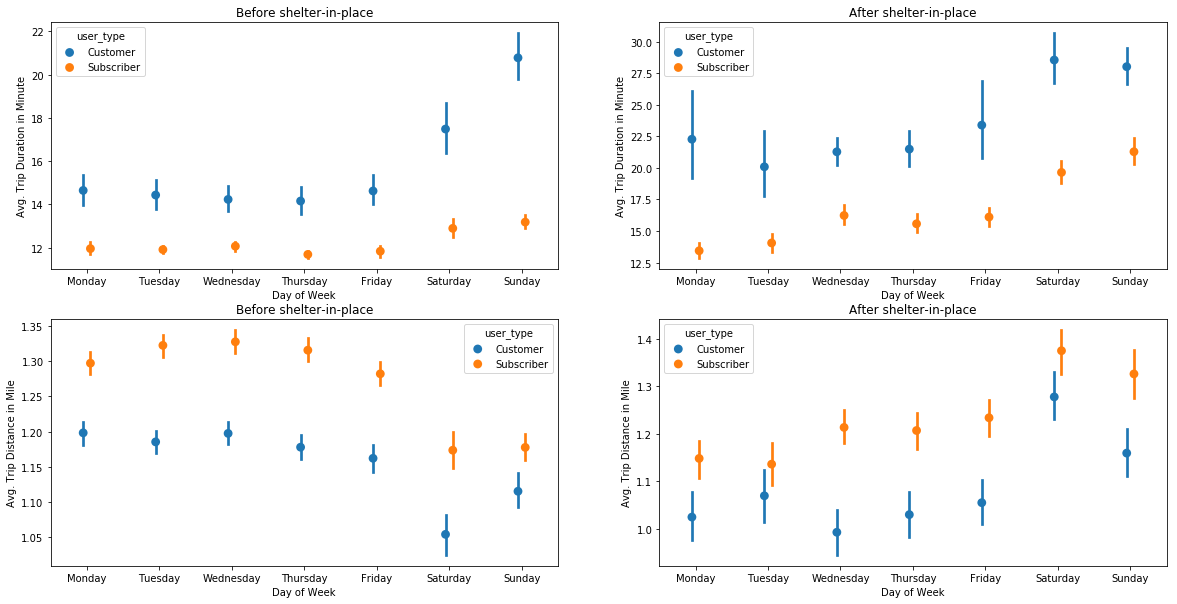

In [54]:
plt.figure(figsize = [20, 10])

plt.subplot(2, 2, 1)
sb.pointplot(data=df[df['SIP']=='Before shelter-in-place'], x='start_dayofweek', y='duration_min', hue='user_type', dodge=0.1, linestyles="", order=weekday);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Before shelter-in-place');

plt.subplot(2, 2, 2)
sb.pointplot(data=df[df['SIP']=='After shelter-in-place'], x='start_dayofweek', y='duration_min', hue='user_type', dodge=0.1, linestyles="", order=weekday);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('After shelter-in-place');

plt.subplot(2, 2, 3)
sb.pointplot(data=df[df['SIP']=='Before shelter-in-place'], x='start_dayofweek', y='trip_distance', hue='user_type', dodge=0.1, linestyles="", order=weekday);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Distance in Mile');
plt.title('Before shelter-in-place');

plt.subplot(2, 2, 4)
sb.pointplot(data=df[df['SIP']=='After shelter-in-place'], x='start_dayofweek', y='trip_distance', hue='user_type', dodge=0.1, linestyles="", order=weekday);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Distance in Mile');
plt.title('After shelter-in-place');


> However, the customer has a higher average trip duration on each day of the week and both before and after the SIP order while customer has fewer average trip distance on each day of the week and both before and after the SIP order.  

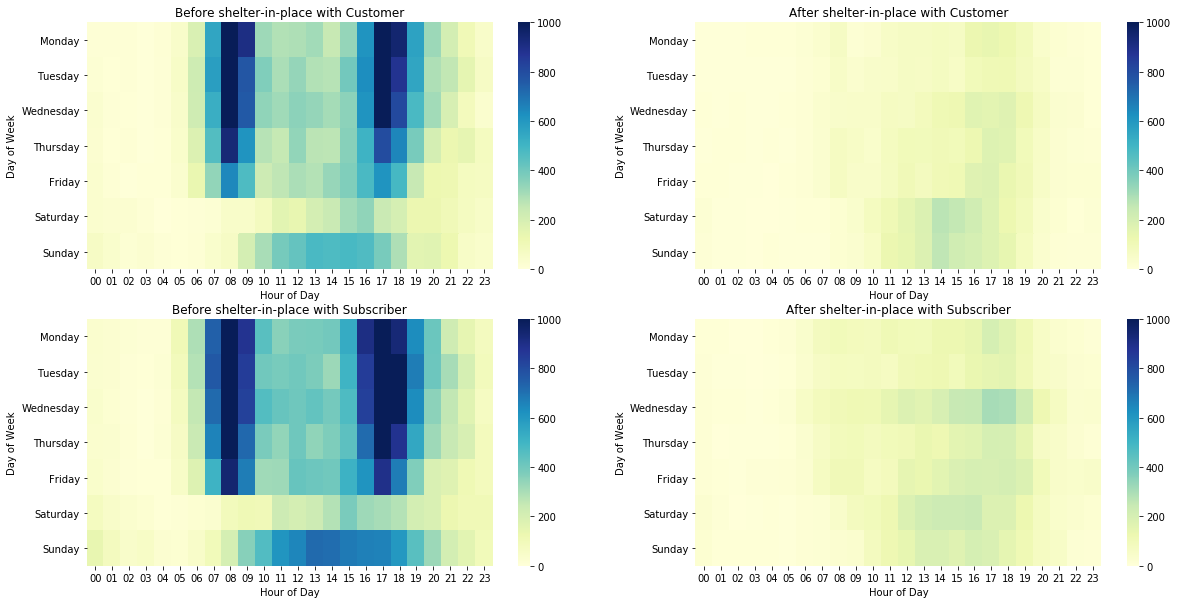

In [55]:
plt.figure(figsize = [20, 10])

plt.subplot(2, 2, 1)
cust = df[df['SIP']=='Before shelter-in-place'].query('user_type == "Customer"')
cust = cust.groupby(['start_dayofweek', 'start_hourofday']).size()
cust = cust.reset_index(name='count')
cust = cust.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
cust.index = pd.CategoricalIndex(cust.index, categories= weekday)
cust.sort_index(level=0, inplace=True)
sb.heatmap(cust, cmap="YlGnBu", vmin=0, vmax=1000);
plt.title('Customer');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.title('Before shelter-in-place with Customer');

plt.subplot(2, 2, 2)
cust = df[df['SIP']=='After shelter-in-place'].query('user_type == "Customer"')
cust = cust.groupby(['start_dayofweek', 'start_hourofday']).size()
cust = cust.reset_index(name='count')
cust = cust.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
cust.index = pd.CategoricalIndex(cust.index, categories= weekday)
cust.sort_index(level=0, inplace=True)
sb.heatmap(cust, cmap="YlGnBu", vmin=0, vmax=1000);
plt.title('Customer');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.title('After shelter-in-place with Customer');



plt.subplot(2, 2, 3)
subs = df[df['SIP']=='Before shelter-in-place'].query('user_type == "Subscriber"')
subs = subs.groupby(['start_dayofweek', 'start_hourofday']).size()
subs = subs.reset_index(name='count')
subs = subs.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
subs.index = pd.CategoricalIndex(subs.index, categories= weekday)
subs.sort_index(level=0, inplace=True)
sb.heatmap(subs, cmap="YlGnBu", vmin=0, vmax=1000);
plt.title('Subscriber');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.title('Before shelter-in-place with Subscriber');


plt.subplot(2, 2, 4)
subs = df[df['SIP']=='After shelter-in-place'].query('user_type == "Subscriber"')
subs = subs.groupby(['start_dayofweek', 'start_hourofday']).size()
subs = subs.reset_index(name='count')
subs = subs.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
subs.index = pd.CategoricalIndex(subs.index, categories= weekday)
subs.sort_index(level=0, inplace=True)
sb.heatmap(subs, cmap="YlGnBu", vmin=0, vmax=1000);
plt.title('Subscriber');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.title('After shelter-in-place with Subscriber');

> On the heatmap, we can easily compare the number of bike trips each day of week and each hour of the day before and after the SIP order. During the work hours from 6 am through 9 pm on weekdays, the count of bike trips remarkably was reduced after the SIP order. Also, the count of the recreation bike trips on Sundays was reduced after the SIP order.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When applied trip duration instead of count on the bar plot of the day of the week before and after the SIP order, the after-SIP order has a more average trip duration than the before-SIP order. The count after the SIP order was reduced, but the trip duration increased. During the weekend the average trip duration has higher than the trips on weekdays on both of before and after the SIP order.

>The count of the subscriber user type has more than the count of the customer on each day of the week and both before and after the SIP order, even each hour of the day. 

>However, the customer has a higher average trip duration on each day of the week and both before and after the SIP order while customer has fewer average trip distance on each day of the week and both before and after the SIP order.  

>On the heatmap, we can easily compare the number of bike trips each day of week and each hour of the day before and after the SIP order. During the work hours from 6 am through 9 pm on weekdays, the count of bike trips remarkably was reduced after the SIP order. Also, the count of the recreation bike trips on Sundays was reduced after the SIP order.


### Were there any interesting or surprising interactions between features?

> Interestingly the count of the subscriber user type has always more than the count of the customer on every single comparison on day of the week and both before and after the SIP order, even each hour of the day.
The subscriber has a larger average trip distance on every single comparison on each day of the week and both before and after the SIP order.  However, the subscriber has a fewer average trip duration on each day of the week and both before and after the SIP order. 
